# Module - 4

Logistic Regression

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('churn.csv')

In [4]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Zip Code', 'Latitude', 'Longitude',
       'Tenure in Months', 'Offer', 'Internet Type', 'Avg Monthly GB Download',
       'Unlimited Data', 'Contract', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Extra Data Charges', 'Total Revenue',
       'Customer Status'],
      dtype='object')

In [5]:
del data['Customer ID']
del data['Gender']
del data['Zip Code']
del data['Latitude']
del data['Longitude']
del data['Total Charges']
del data['Total Revenue']

In [6]:
df=data.dropna()

In [7]:
data['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [8]:
df.drop(df.index[df['Customer Status'] == 'Joined'], inplace=True)

In [9]:
df['Customer Status'].value_counts()

Customer Status
Stayed     1620
Churned     757
Name: count, dtype: int64

In [10]:
df = df.rename({'Tenure in Months': 'Tenure_in_Months', 'Internet Service': 'Internet_Service',
                'Internet Type': 'Internet_Type', 'Avg Monthly GB Download': 'Avg_Monthly_GB_Download',
                'Unlimited Data': 'Unlimited_Data', 'Payment Method': 'Payment_Method',
                'Monthly Charge': 'Monthly_Charge', 'Total Charges': 'Total_Charges',
                'Total Extra Data Charges': 'Total_Extra_Data_Charges', 'Customer Status': 'Customer_Status'}, axis=1)

In [11]:
df.head()

,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Extra_Data_Charges,Customer_Status
2,50,4,Offer E,Fiber Optic,30.0,Yes,Month-to-Month,Bank Withdrawal,73.90,0,Churned
3,78,13,Offer D,Fiber Optic,4.0,Yes,Month-to-Month,Bank Withdrawal,98.00,0,Churned
5,23,9,Offer E,Cable,73.0,Yes,Month-to-Month,Credit Card,69.40,0,Stayed
6,67,71,Offer A,Fiber Optic,14.0,Yes,Two Year,Bank Withdrawal,109.70,0,Stayed
7,52,63,Offer B,Fiber Optic,7.0,No,Two Year,Credit Card,84.65,20,Stayed


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2377 entries, 2 to 7041
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2377 non-null   int64  
 1   Tenure_in_Months          2377 non-null   int64  
 2   Offer                     2377 non-null   object 
 3   Internet_Type             2377 non-null   object 
 4   Avg_Monthly_GB_Download   2377 non-null   float64
 5   Unlimited_Data            2377 non-null   object 
 6   Contract                  2377 non-null   object 
 7   Payment_Method            2377 non-null   object 
 8   Monthly_Charge            2377 non-null   float64
 9   Total_Extra_Data_Charges  2377 non-null   int64  
 10  Customer_Status           2377 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 222.8+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Offer', 'Internet_Type', 'Unlimited_Data', 'Contract', 'Payment_Method', 'Customer_Status']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [14]:
df

,Age,Tenure_in_Months,Offer,Internet_Type,Avg_Monthly_GB_Download,Unlimited_Data,Contract,Payment_Method,Monthly_Charge,Total_Extra_Data_Charges,Customer_Status
2,50,4,4,2,30.0,1,0,0,73.90,0,0
3,78,13,3,2,4.0,1,0,0,98.00,0,0
5,23,9,4,0,73.0,1,0,1,69.40,0,1
6,67,71,0,2,14.0,1,2,0,109.70,0,1
7,52,63,1,2,7.0,0,2,1,84.65,20,1
...,...,...,...,...,...,...,...,...,...,...,...
7035,20,7,4,2,42.0,1,1,1,94.05,0,1
7036,53,1,4,2,9.0,1,0,1,70.15,0,0
7038,20,13,3,1,59.0,1,1,1,55.15,0,1
7039,40,22,3,2,17.0,1,0,0,85.10,0,0


In [15]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Customer_Status', axis=1)
#Response variable
y = df.loc[:,'Customer_Status']

In [16]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 1620, 0: 757})
OVER SAMPLING DATA COUNT  :  Counter({0: 1620, 1: 1620})


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  2268
Number of test dataset     :  972
Total number of dataset    :  3240


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Training Process

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predicted_lr = lr.predict(X_test)

Getting Accuracy

In [21]:
accuracy = accuracy_score(y_test,predicted_lr)
print('Accuracy of Logistic Regression is: ',accuracy*100)

Accuracy of Logistic Regression is:  79.93827160493827


Finding Classification Report

In [22]:
cr = classification_report(y_test,predicted_lr)
print('Classification report\n---------------------\n',cr)

Classification report
---------------------
               precision    recall  f1-score   support

           0       0.75      0.89      0.82       486
           1       0.86      0.71      0.78       486

    accuracy                           0.80       972
   macro avg       0.81      0.80      0.80       972
weighted avg       0.81      0.80      0.80       972



Finding Confusion Matrix

In [23]:
cm = confusion_matrix(y_test,predicted_lr)
print('Confusion matrix\n----------------\n',cm)

Confusion matrix
----------------
 [[432  54]
 [141 345]]


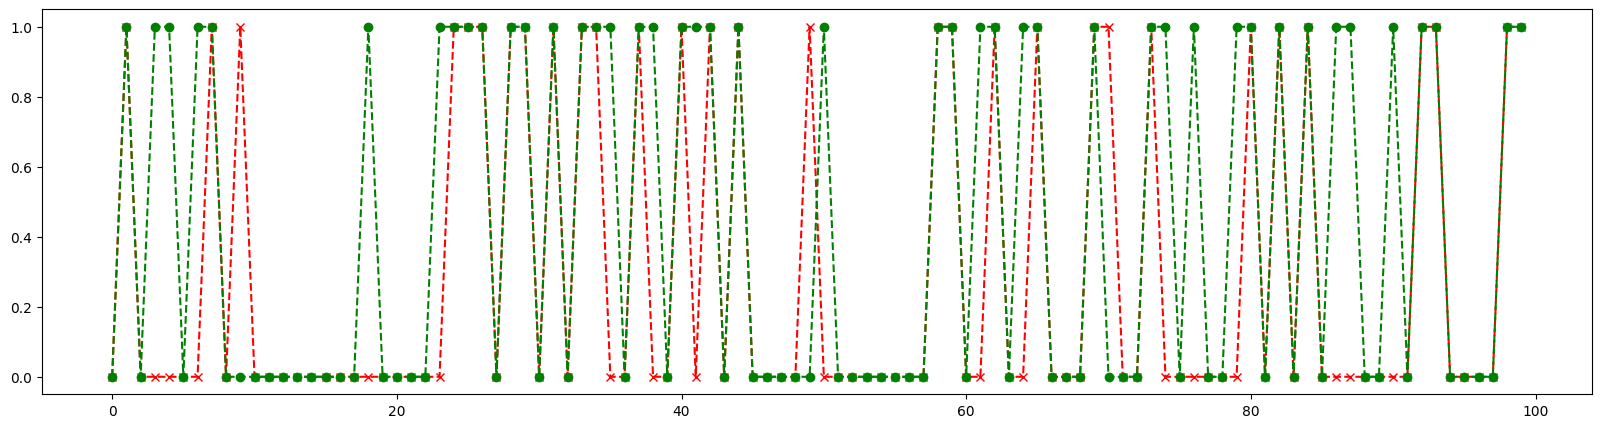

In [24]:
DF = p.DataFrame()
DF["y_test"] = y_test
DF["predicted"] = predicted_lr
DF.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(DF["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(DF["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()